In [23]:
%config InlineBackend.figure_formats = ['retina']

In [39]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set()

In [2]:
panel_data = pd.read_csv('./data/panel_data_04_05.csv')

In [32]:
# I have chosen 6 at random, in order to have not too many profiles
top_rated = panel_data[(panel_data.score>6)&(panel_data['Price/hour in USD']<200)]

In [33]:
np.mean(top_rated.score), np.max(top_rated.score), np.min(top_rated.score)

(6.885419006479482, 10.636, 6.002000000000002)

In [34]:
old_profiles, new_profiles = top_rated[top_rated.scraping_date=='26-04-2021'], top_rated[top_rated.scraping_date=='17-05-2021']

In [35]:
np.mean(old_profiles['Price/hour in USD']), np.mean(new_profiles['Price/hour in USD'])

(36.563531114327176, 36.94108882521478)

In [36]:
panel_data

,name,languages,description,rating,nb_reviews,Price/hour in USD,skills,industry_expertise,nb_projects,nb_buyers,last_active,gender,city,country,score,scraping_date
0,Maria H.,['English'],We are a small UK based company speciaIising i...,4.9,4694,34.74,"['animation', 'graphics design', 'brand design...","['IT', 'Internet', 'Marketing', 'Media', 'Tech...",7672,4168,26-04-2021,female,Sheffield,United Kingdom,10.043,26-04-2021
1,Maria H.,['English'],We are a small UK based company speciaIising i...,4.9,4745,35.21,"['animation', 'graphics design', 'brand design...","['IT', 'Internet', 'Marketing', 'Media', 'Tech...",7727,4204,17-05-2021,female,Sheffield,United Kingdom,10.054,17-05-2021
2,Jessica O'Neill,['English'],Your blog content and website copy need to be ...,5.0,1215,76.42,"['editing', 'proofreading', 'transcription', '...","['PR', 'Sales', 'Travel']",1541,878,26-04-2021,female,City of London,United Kingdom,8.712,26-04-2021
3,Jessica O'Neill,['English'],Your blog content and website copy need to be ...,5.0,1220,77.47,"['editing', 'proofreading', 'transcription', '...","['PR', 'Sales', 'Travel']",1546,880,17-05-2021,female,City of London,United Kingdom,8.716,17-05-2021
4,Scott Anfield,['English'],An experienced and professional writer based i...,4.9,1719,20.84,"['article', 'product description', 'content wr...","['Advertising', 'Education', 'Marketing', 'Sal...",1750,1071,25-04-2021,male,Doncaster,United Kingdom,9.039,26-04-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18796,Morteza Rezvani,"['English', 'Persian']",NaN,0.0,0,10.00,"['video editing', 'content writing', 'online a...","['Advertising', 'Marketing']",0,0,25-04-2021,unknown,Manila,Philippines,0.000,26-04-2021
18797,Morteza Rezvani,"['English', 'Persian']",NaN,0.0,0,10.00,"['video editing', 'content writing', 'online a...","['Advertising', 'Marketing']",0,0,25-04-2021,unknown,Scarborough,United Kingdom,0.000,17-05-2021
18798,Paul Waters,[],"Sony award winning creative writer, radio, TV ...",5.0,6,41.68,"['editing', 'proofreading', 'copywriting', 'jo...",[],5,5,28-09-2020,male,London,United Kingdom,3.434,26-04-2021
18799,Paul Waters,[],"Sony award winning creative writer, radio, TV ...",5.0,6,42.25,"['editing', 'proofreading', 'copywriting', 'jo...",[],5,5,28-09-2020,male,London,United Kingdom,3.434,17-05-2021


<AxesSubplot:xlabel='Price/hour in USD', ylabel='Count'>

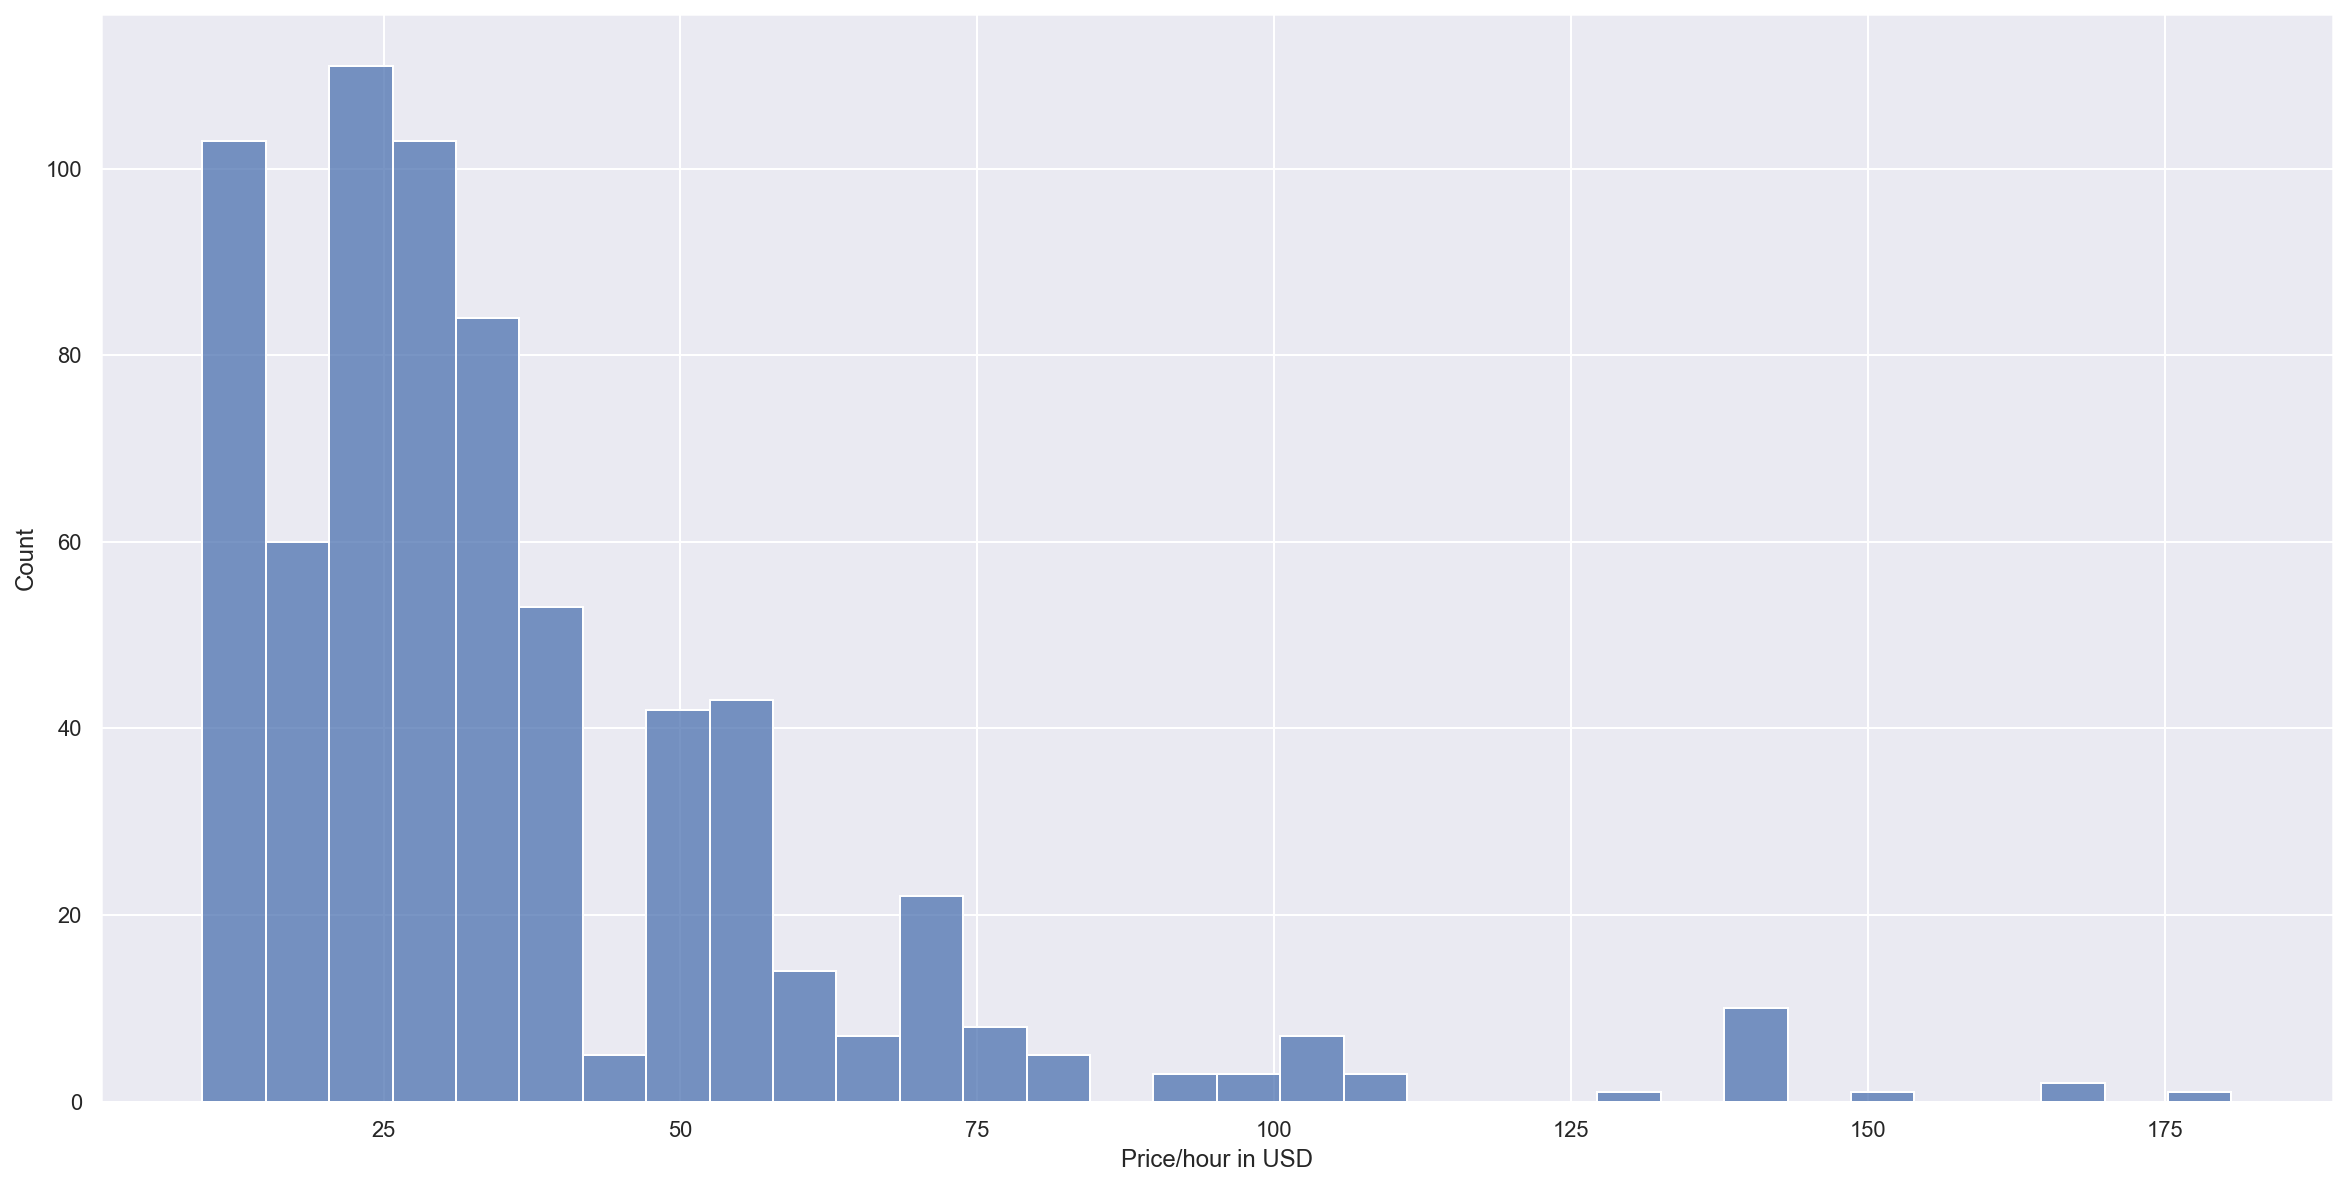

In [40]:
plt.figure(figsize=(20,10))
sn.histplot(x='Price/hour in USD', data=old_profiles)

<AxesSubplot:xlabel='Price/hour in USD', ylabel='Count'>

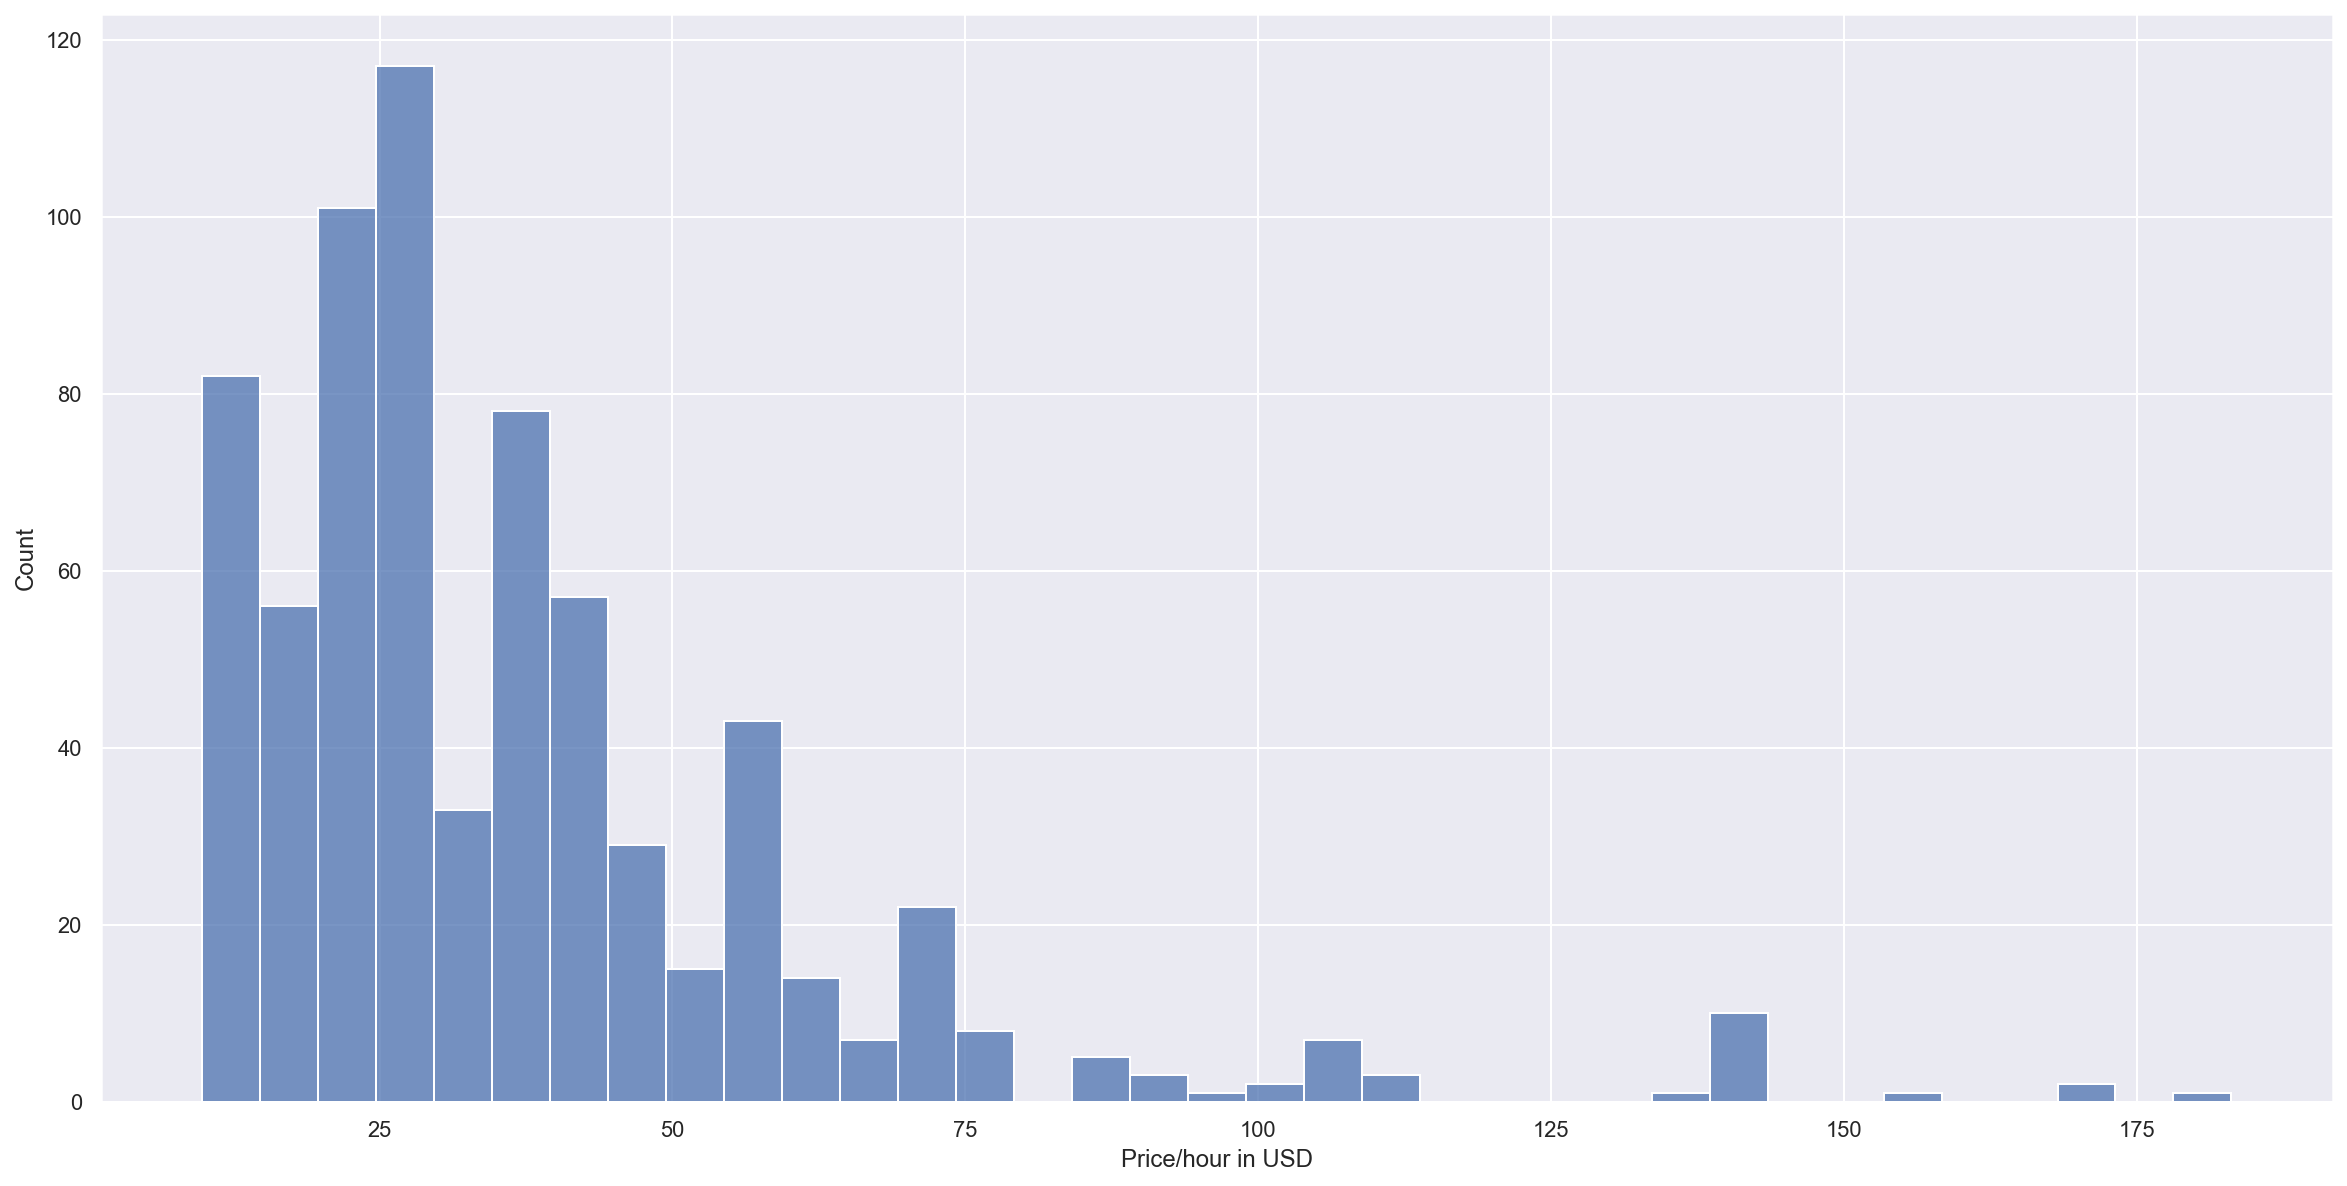

In [41]:
plt.figure(figsize=(20,10))
sn.histplot(x='Price/hour in USD', data=new_profiles)

In [97]:
def feature_evolution(feature: str, df: pd.DataFrame=panel_data) -> np.ndarray:
    u_names = np.unique(df.name)
    evol = np.zeros(len(u_names))
    for i,name in enumerate(u_names):
        tmp = df[df.name==name]
        if len(tmp)==2:
            feature_val = tmp[feature].values
            if feature_val[0]!=0:
                feature_evol = feature_val[1]/feature_val[0]-1
                evol[i] = feature_evol
    return evol

In [103]:
def display_info(feature_evol: np.ndarray):
    print('Average evolution: {}%'.format(round(np.mean(feature_evol)*100,2)))
    print('Maximum evolution: {}%'.format(round(np.max(feature_evol)*100,2)))
    print('Minimum evolution: {}%'.format(round(np.min(feature_evol)*100,2)))

In [115]:
prices_evol = feature_evolution('Price/hour in USD')
score_evol = feature_evolution('score')
projects_evol = feature_evolution('nb_projects')
rating_evol = feature_evolution('rating')
review_evol = feature_evolution('nb_reviews')

In [116]:
display_info(prices_evol)

Average evolution: 1.11%
Maximum evolution: 261.87%
Minimum evolution: -66.67%


In [117]:
display_info(score_evol)

Average evolution: 0.31%
Maximum evolution: 68.74%
Minimum evolution: -0.68%


In [118]:
display_info(projects_evol)

Average evolution: 1.07%
Maximum evolution: 300.0%
Minimum evolution: 0.0%


In [119]:
display_info(rating_evol)

Average evolution: 0.0%
Maximum evolution: 17.5%
Minimum evolution: -20.0%


In [120]:
display_info(review_evol)

Average evolution: 1.21%
Maximum evolution: 200.0%
Minimum evolution: -2.13%
